In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 26  836k   26  223k    0     0   178k      0  0:00:04  0:00:01  0:00:03  178k
100  836k  100  836k    0     0   575k      0  0:00:01  0:00:01 --:--:--  575k


In [3]:

data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [6]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [12]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('marathon-data.csv', 
                  converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [14]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [36]:
masx = []
masy = []
for x in data['split']:
    masx.append(x.total_seconds())

for  y in data['final']:
    masy.append(y.total_seconds())
data['split_sec'] = masx
data['final_sec'] = masy

data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


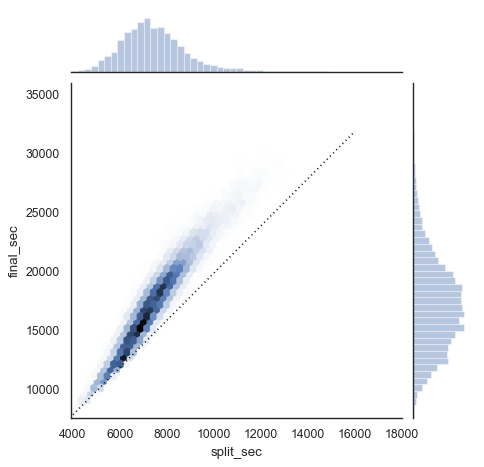

In [45]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k')

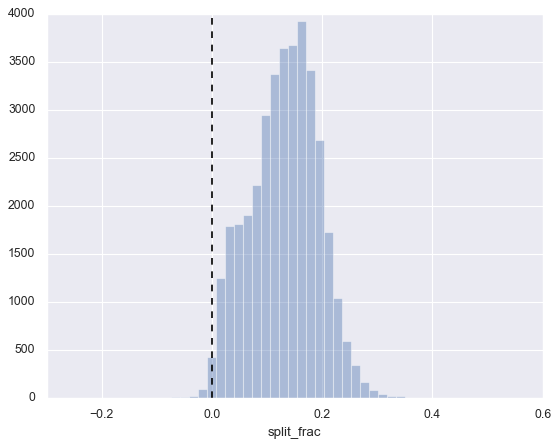

In [57]:
data['split_frac'] = 1 - 2* data['split_sec']/data['final_sec']
#Смотрим на то, кто ускорялся после середины. Если значение положительное, значит замедлился
data.head()
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color= 'black', linestyle='--')

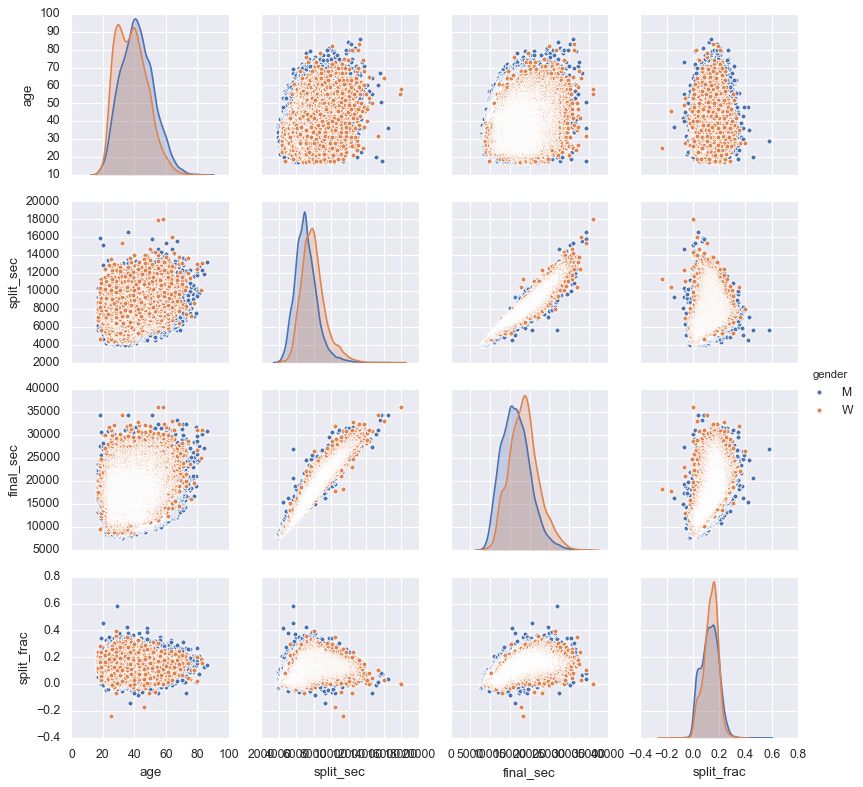

In [61]:
sns.pairplot(data, hue='gender')

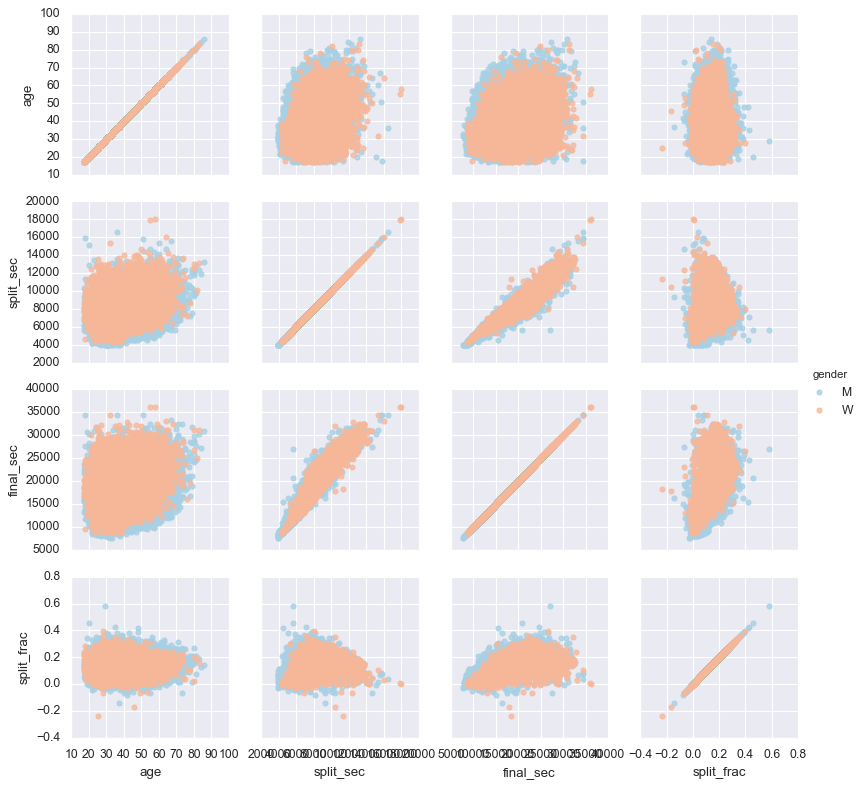

In [63]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

Text(0.5, 0, 'split_frac')

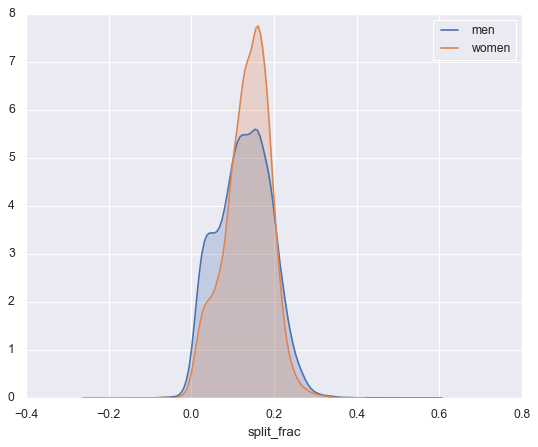

In [65]:
sns.kdeplot(data.split_frac[data.gender=="M"], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=="W"], label='women', shade=True)
plt.xlabel('split_frac')

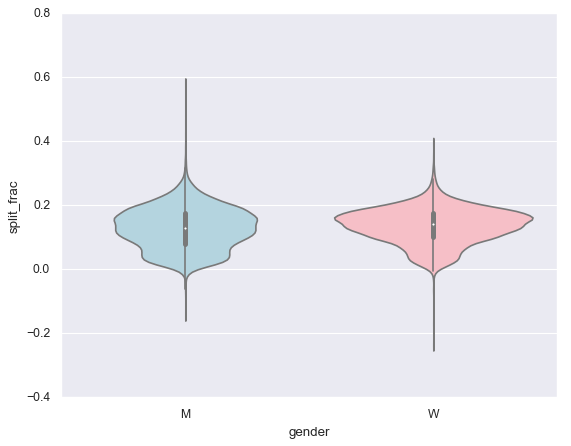

In [67]:
sns.violinplot('gender', 'split_frac', data=data,
              palette = ['lightblue', 'lightpink'])

In [69]:
data['age_dec'] = 10 * (data.age//10)
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


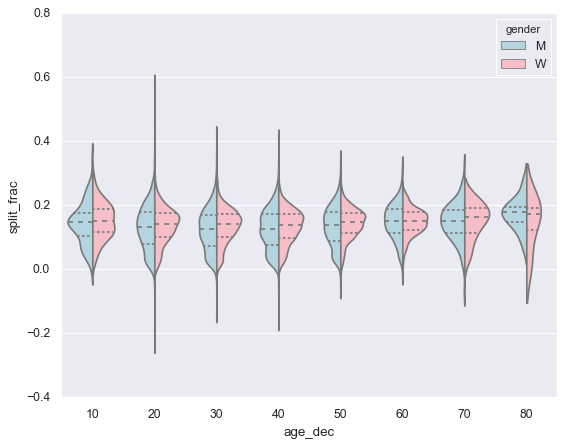

In [75]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data,
                  split=True, inner='quartile',
                  palette = ['lightblue', 'lightpink'])
    

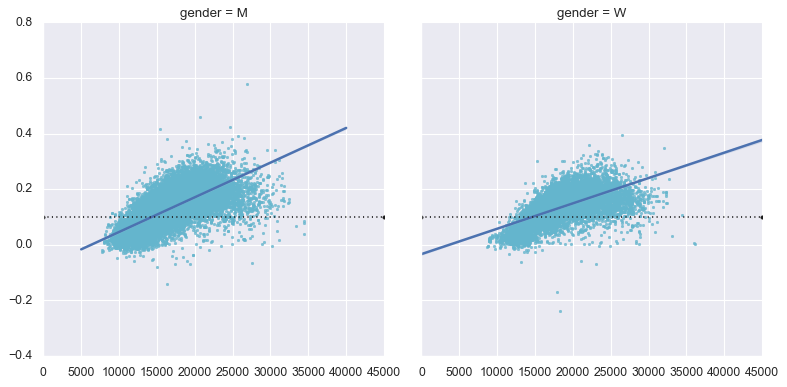

In [82]:
g= sns.lmplot('final_sec', 'split_frac',col = 'gender', data = data,
              markers='.', scatter_kws = dict(color='c'))
g.map(plt.axhline, y = 0.1, color='k', ls=':')